<a href="https://colab.research.google.com/github/santiagorg2401/tensorflow_course_exercises/blob/main/03_introduction_to_computer_vision_with_tensorflow_MultiClassClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Convolutional Neural Networks and Computer Vision with TensorFlow.
Multi-class classification approach.

Remember the steps:
1. Become one with the data.
2. Preprocess the data.
3. Create and fit a model (start with a baseline. See: https://paperswithcode.com/)
4. Evaluate the model.
5. Adjust hyperparameters and improve the model (improve baseline/reduce overfitting).
6. Repeat until satisfied.

## Helper functions.

In [28]:
# Plot validation ans training curves separately.
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def plot_loss_curves(history):
  """
  Returns separate loss curves for training and validation metrics.
  """
  loss = history.history["loss"]
  val_loss = history.history["val_loss"]

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history["loss"]))

  plt.plot(epochs, loss, label="training_loss")
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title("loss")
  plt.xlabel("epochs")
  plt.legend()

  plt.figure()
  plt.plot(epochs, accuracy, label="training_accuracy")
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title("accuracy")
  plt.xlabel("epochs")
  plt.legend()

def view_random_image(target_dir, target_class, i=1):
  """
  Get a random image path, read it and plot it.
  target_dir: String. It contains the target directory where the iamges are stored.
  target_class: String. The class name of the image to plot.

  i: Integer. Number of images to retrieve.
  """
  # Setup the targer directory.
  target_folder = target_dir + target_class

  imgs = []

  for j in range(0,i):
    # Get a random image path.
    random_image = random.sample(os.listdir(target_folder), 1)
    print(random_image)
    # Read in the image and plot it.
    img  = mpimg.imread(target_folder + "/" + random_image[0])
    fig, (ax) = plt.subplots()
    ax.imshow(img)
    ax.set_title(target_class)
    ax.set_axis_off()
    print(f"Image shape: {img.shape}")
    imgs.append(img)

  plt.show()
  return img

def load_and_prep_img(filename, img_shape=(224,224)):
  """
  Reads an image from `filename`, turns into a tensor and reshapes it.
  """

  # Read in the image.
  img = tf.io.read_file(filename)

  # Decode the read file into a tensor.
  img = tf.image.decode_image(img)

  # Resize the image.
  img = tf.image.resize(img, size=img_shape)

  # Rescale the image.
  img = img/255.
  return img

def pred_and_plot(model, filename, class_names):
  """
  Makes a prediction based on a filename and plots it.

  Keyword arguments:
  model -- TensorFlow model.
  filename -- String, contains file path to input image.
  class_names -- List, contains class names.
  """

  # Import image and preprocess it.
  img = load_and_prep_img(filename)

  # Make a prediction.
  pred = model.predict(tf.expand_dims(img, axis=0))

  # Get the predicted class for multi-class and binary classification..
  if len(pred[0]) > 1:
    pred_class = class_names[tf.argmax(pred[0])]
  else:
    pred_class = class_names[int(tf.round(pred[0]))]

  # Plot image and predicted class as title.
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False)

## Import and become one with the data.

In [9]:
# Unzip data.
import zipfile
import os

try:
  zip_ref = zipfile.ZipFile("10_food_classes_all_data.zip")
  zip_ref.extractall()
  zip_ref.close()
except:
  print("File not found, downloading and trying again.")
  # Download dataset.
  !wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
  zip_ref = zipfile.ZipFile("10_food_classes_all_data.zip")
  zip_ref.extractall()
  zip_ref.close()

# Get familiar with class names.
for dirpath, dirnames, filenames in os.walk("10_food_classes_all_data"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in '10_food_classes_all_data'.
There are 10 directories and 0 images in '10_food_classes_all_data/test'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/grilled_salmon'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/steak'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/chicken_curry'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/fried_rice'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/chicken_wings'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/pizza'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/ramen'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/hamburger'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/ice_cream'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/sushi'.
There are 

In [10]:
import pathlib
import numpy as np

# Setup the train and test directories.
train_dir = "10_food_classes_all_data/train/"
test_dir = "10_food_classes_all_data/test/"

# Set image and batch size.
IMG_SIZE = (224, 224)
BATCH_SIZE = 32

# Get class names.
data_dir = pathlib.Path(train_dir)
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))

print(class_names)

['chicken_curry' 'chicken_wings' 'fried_rice' 'grilled_salmon' 'hamburger'
 'ice_cream' 'pizza' 'ramen' 'steak' 'sushi']


['201324.jpg']
Image shape: (512, 382, 3)
['1203218.jpg']
Image shape: (512, 512, 3)


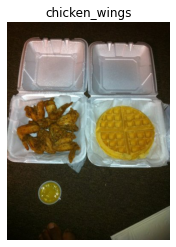

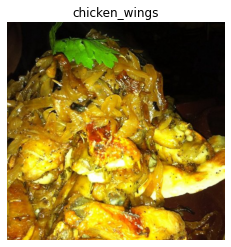

['587022.jpg']
Image shape: (512, 512, 3)
['3698157.jpg']
Image shape: (512, 512, 3)


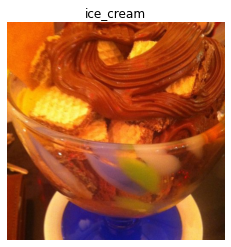

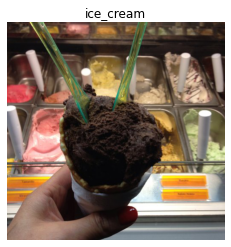

In [11]:
# Visualize.
import random
img = view_random_image(target_dir=train_dir,
                        target_class='chicken_wings',
                        i=2)

img = view_random_image(target_dir=train_dir,
                        target_class='ice_cream',
                        i=2)

In [2]:
# Load models if available.http://localhost:8888/?token=7d263c1be881d4cbb78e00e9317ce9f671727c85b30db4ba
import tensorflow as tf

try:
  model_1 = tf.keras.models.load_model("models/models_03MultiClass/model_1")
  model_2 = tf.keras.models.load_model("models/models_03MultiClass/model_2")
  model_3 = tf.keras.models.load_model("models/models_03MultiClass/model_3")
  model_4 = tf.keras.models.load_model("models/models_03MultiClass/model_4")
  print("Models loaded.")
except:
  print("No models available, proceed to train.")

Models loaded.


## `model_1`

### 1. Preprocess the data.

In [13]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Rescale.
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

# Load data in from directories and turn it into batches.
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=IMG_SIZE,
                                               batch_size=BATCH_SIZE,
                                               class_mode='categorical')
test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=IMG_SIZE,
                                             batch_size=BATCH_SIZE,
                                             class_mode='categorical')

Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


### 2. Create the model (start with a baseline).
Baseline: CNN Explainer.

In [17]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense
from tensorflow.keras.optimizers import Adam

# Check physical devices for GPU.
physical_devices = tf.config.list_physical_devices('GPU')
print("Num GPUs:", len(physical_devices))

# Set random seed.
tf.random.set_seed(24)

# Build the model.
model_1 = Sequential([
    Conv2D(10, 3, activation='relu', input_shape = (224, 224, 3)),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(),
    Conv2D(10, 3, activation='relu'),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(),
    Flatten(),
    Dense(len(class_names), activation='softmax')
])

# Compile the model.
model_1.compile(loss=["categorical_crossentropy"],
                optimizer=Adam(),
                metrics=["accuracy"])

# Fit the model.
history_1 = model_1.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Num GPUs: 1
Epoch 1/5
235/235 [==============================] - 32s 120ms/step - loss: 2.1731 - accuracy: 0.1868 - val_loss: 2.0692 - val_accuracy: 0.2428
Epoch 2/5
235/235 [==============================] - 29s 122ms/step - loss: 1.9035 - accuracy: 0.3388 - val_loss: 1.8758 - val_accuracy: 0.3356
Epoch 3/5
235/235 [==============================] - 28s 121ms/step - loss: 1.4910 - accuracy: 0.4977 - val_loss: 2.0101 - val_accuracy: 0.3268
Epoch 4/5
235/235 [==============================] - 29s 122ms/step - loss: 0.8538 - accuracy: 0.7185 - val_loss: 2.4301 - val_accuracy: 0.3020
Epoch 5/5
235/235 [==============================] - 27s 116ms/step - loss: 0.2878 - accuracy: 0.9172 - val_loss: 3.8286 - val_accuracy: 0.2712


In [15]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 10)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 53, 53, 10)       0         
 2D)                                                    

### 3. Evaluate the model.

In [ ]:
model_1.evaluate(test_data)

79/79 [==============================] - 7s 85ms/step - loss: 3.2122 - accuracy: 0.2996


[3.2122323513031006, 0.2996000051498413]

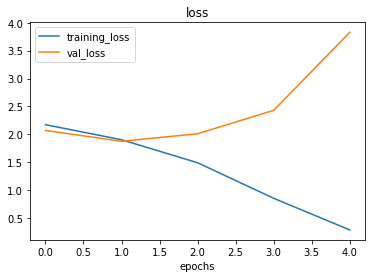

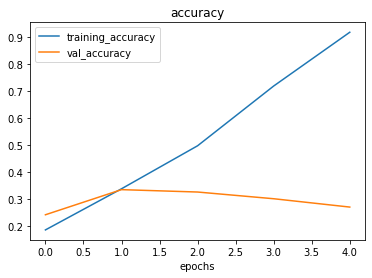

In [18]:
plot_loss_curves(history_1)

### 4. Save model.

In [ ]:
model_1.save(filepath="models/models_03MultiClass/model_1")

INFO:tensorflow:Assets written to: models/model_1/assets


INFO:tensorflow:Assets written to: models/model_1/assets


🔑 As the val_loss curve is exploding, the model is overfitting.

## Reduce overfitting!!! 🚩
* Get more data.
* Simplify model:
  * Reduce number of layers.
  * Reduce mumber of hidden units in layers.
  * Use data augmentation.
* Better data quality.
* Transfer learning.

## `model_2`: Simplified version of `model_1`.
Remove convolutional layers.

### 1. Preprocess the data.

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Rescale.
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

# Load data in from directories and turn it into batches.
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=IMG_SIZE,
                                               batch_size=BATCH_SIZE,
                                               class_mode='categorical')
test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=IMG_SIZE,
                                             batch_size=BATCH_SIZE,
                                             class_mode='categorical')

Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


###2. Create the model.

In [ ]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense
from tensorflow.keras.optimizers import Adam

# Check pysical devices for GPU.
physical_devices = tf.config.list_physical_devices('GPU')
print("Num GPUs:", len(physical_devices))

# Set random seed.
tf.random.set_seed(24)

# Build the model.
model_2 = Sequential([
    Conv2D(10, 3, activation='relu', input_shape = (224, 224, 3)),
    MaxPool2D(),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(),
    Flatten(),
    Dense(len(class_names), activation='softmax')
])

# Compile the model.
model_2.compile(loss=["categorical_crossentropy"],
                optimizer=Adam(),
                metrics=["accuracy"])

# Fit the model.
history_2 = model_2.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Num GPUs: 1
Epoch 1/5
235/235 [==============================] - 29s 121ms/step - loss: 2.2047 - accuracy: 0.2020 - val_loss: 2.0600 - val_accuracy: 0.2616
Epoch 2/5
235/235 [==============================] - 29s 123ms/step - loss: 1.9037 - accuracy: 0.3439 - val_loss: 1.9960 - val_accuracy: 0.2824
Epoch 3/5
235/235 [==============================] - 28s 118ms/step - loss: 1.6041 - accuracy: 0.4664 - val_loss: 2.0933 - val_accuracy: 0.2820
Epoch 4/5
235/235 [==============================] - 27s 114ms/step - loss: 1.1170 - accuracy: 0.6396 - val_loss: 2.3012 - val_accuracy: 0.2956
Epoch 5/5
235/235 [==============================] - 26s 112ms/step - loss: 0.6108 - accuracy: 0.8185 - val_loss: 2.8333 - val_accuracy: 0.2524


In [ ]:
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 111, 111, 10)     0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 54, 54, 10)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 29160)             0         
                                                                 
 dense_1 (Dense)             (None, 10)               

### 3. Evaluate the model.

In [ ]:
model_2.evaluate(test_data)

79/79 [==============================] - 7s 83ms/step - loss: 2.8333 - accuracy: 0.2524


[2.8333370685577393, 0.2524000108242035]

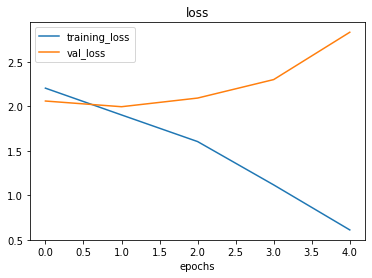

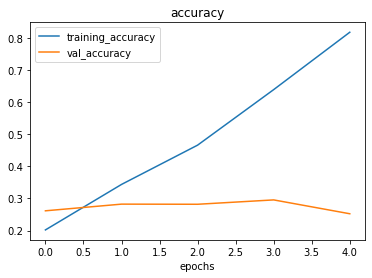

In [ ]:
plot_loss_curves(history_2)

### 4. Save model.

In [ ]:
model_2.save(filepath="models/models_03MultiClass/model_2")

INFO:tensorflow:Assets written to: models/model_2/assets


INFO:tensorflow:Assets written to: models/model_2/assets


## `model_3` Using data augmentation.
Same as baseline `model_1`

### 1. Preprocess the data.

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Create ImageDataGenerator training instance with data augmentation.
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=0.2,
                                             zoom_range=0.2,
                                             width_shift_range=0.2,
                                             height_shift_range=0.3,
                                             horizontal_flip=True)

# Create ImageDataGenerator test instance without data augmentation.
test_datagen = ImageDataGenerator(rescale=1/255.)

# Import data from directory.
train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   target_size=IMG_SIZE,
                                                                   batch_size=BATCH_SIZE,
                                                                   class_mode="categorical",
                                                                   shuffle=True)

test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=IMG_SIZE,
                                             batch_size=BATCH_SIZE,
                                             class_mode="categorical")

Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


### 2. Create the model.

In [ ]:
import tensorflow as tf

from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D
from tensorflow.keras import Sequential

# Check physical devices for GPU.
physical_devices = tf.config.list_physical_devices('GPU')
print("Num GPUs:", len(physical_devices))

# Set random seed.
tf.random.set_seed(24)

# Build the model.
model_3 = tf.keras.models.clone_model(model_1)

# Compile the model.
model_3.compile(loss=["categorical_crossentropy"],
                optimizer=Adam(),
                metrics=["accuracy"])

# Fit the model.
history_3 = model_3.fit(train_data_augmented,
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Num GPUs: 1
Epoch 1/5
235/235 [==============================] - 66s 278ms/step - loss: 2.2115 - accuracy: 0.1801 - val_loss: 2.0646 - val_accuracy: 0.2504
Epoch 2/5
235/235 [==============================] - 65s 277ms/step - loss: 2.1218 - accuracy: 0.2349 - val_loss: 1.9724 - val_accuracy: 0.3124
Epoch 3/5
235/235 [==============================] - 65s 277ms/step - loss: 2.0886 - accuracy: 0.2559 - val_loss: 1.9374 - val_accuracy: 0.3344
Epoch 4/5
235/235 [==============================] - 65s 278ms/step - loss: 2.0392 - accuracy: 0.2797 - val_loss: 1.8415 - val_accuracy: 0.3512
Epoch 5/5
235/235 [==============================] - 66s 280ms/step - loss: 1.9916 - accuracy: 0.2983 - val_loss: 1.8395 - val_accuracy: 0.3872


In [ ]:
model_3.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 10)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 53, 53, 10)       0         
 2D)                                                    

### 3. Evaluate the model.

In [ ]:
model_3.evaluate(test_data)

79/79 [==============================] - 7s 84ms/step - loss: 1.8395 - accuracy: 0.3872


[1.8394583463668823, 0.3871999979019165]

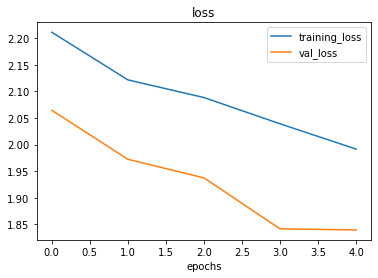

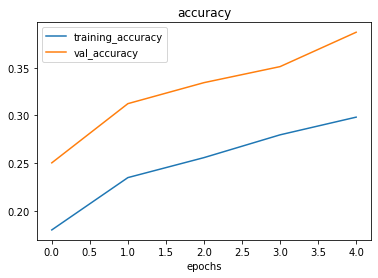

In [ ]:
plot_loss_curves(history_3)

### 4. Save model.

In [ ]:
model_3.save(filepath="models/models_03MultiClass/model_3")

INFO:tensorflow:Assets written to: models/model_3/assets


INFO:tensorflow:Assets written to: models/model_3/assets


## `model_4` train `model_3` for longer

### 1. Preprocess the data.

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Create ImageDataGenerator training instance with data augmentation.
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=0.2,
                                             zoom_range=0.2,
                                             width_shift_range=0.2,
                                             height_shift_range=0.3,
                                             horizontal_flip=True)

# Create ImageDataGenerator test instance without data augmentation.
test_datagen = ImageDataGenerator(rescale=1/255.)

# Import data from directory.
train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   target_size=IMG_SIZE,
                                                                   batch_size=BATCH_SIZE,
                                                                   class_mode="categorical",
                                                                   shuffle=True)

test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=IMG_SIZE,
                                             batch_size=BATCH_SIZE,
                                             class_mode="categorical")

Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


### 2. Create the model.

In [ ]:
import tensorflow as tf

from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D
from tensorflow.keras import Sequential

# Check physical devices for GPU.
physical_devices = tf.config.list_physical_devices('GPU')
print("Num GPUs:", len(physical_devices))

# Set random seed.
tf.random.set_seed(24)

# Build the model.
model_4 = tf.keras.models.clone_model(model_3)

# Compile the model.
model_4.compile(loss=["categorical_crossentropy"],
                optimizer=Adam(),
                metrics=["accuracy"])

# Fit the model.
history_4 = model_4.fit(train_data_augmented,
                        epochs=10,
                        steps_per_epoch=len(train_data_augmented),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Num GPUs: 1
Epoch 1/10
235/235 [==============================] - 65s 275ms/step - loss: 2.1994 - accuracy: 0.1947 - val_loss: 2.0336 - val_accuracy: 0.2668
Epoch 2/10
235/235 [==============================] - 65s 275ms/step - loss: 2.1125 - accuracy: 0.2412 - val_loss: 1.9841 - val_accuracy: 0.3048
Epoch 3/10
235/235 [==============================] - 66s 282ms/step - loss: 2.0661 - accuracy: 0.2637 - val_loss: 2.0379 - val_accuracy: 0.2652
Epoch 4/10
235/235 [==============================] - 66s 281ms/step - loss: 2.0222 - accuracy: 0.2875 - val_loss: 1.8872 - val_accuracy: 0.3384
Epoch 5/10
235/235 [==============================] - 66s 279ms/step - loss: 1.9819 - accuracy: 0.3047 - val_loss: 1.8384 - val_accuracy: 0.3552
Epoch 6/10
235/235 [==============================] - 66s 283ms/step - loss: 1.9600 - accuracy: 0.3116 - val_loss: 1.8715 - val_accuracy: 0.3480
Epoch 7/10
235/235 [==============================] - 66s 280ms/step - loss: 1.9131 - accuracy: 0.3352 - val_loss: 1.7

In [ ]:
model_4.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 10)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 53, 53, 10)       0         
 2D)                                                    

### 3. Evaluate model.

In [ ]:
model_4.evaluate(test_data)

79/79 [==============================] - 7s 87ms/step - loss: 1.6649 - accuracy: 0.4300


[1.6648523807525635, 0.4300000071525574]

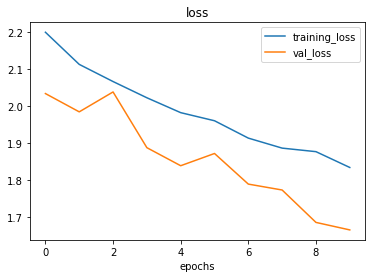

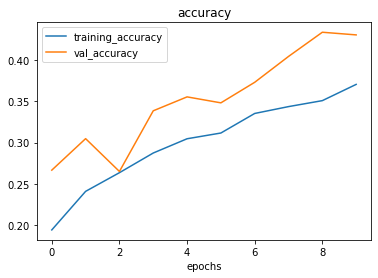

In [ ]:
plot_loss_curves(history_4)

### 4. Save model.

In [ ]:
model_4.save(filepath="models/models_03MultiClass/model_4")

INFO:tensorflow:Assets written to: models/model_4/assets


INFO:tensorflow:Assets written to: models/model_4/assets


## Making predictions with custom images.

1/1 [==============================] - 0s 15ms/step


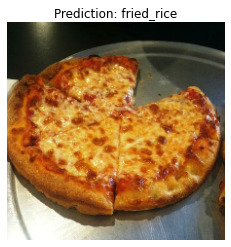

In [31]:
pred_and_plot(model=model_4,
              filename="images/pizza.jpg",
              class_names=class_names)

1/1 [==============================] - 0s 18ms/step


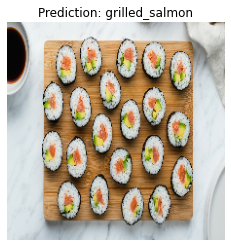

In [32]:
pred_and_plot(model=model_4,
              filename="images/sushi.jpg",
              class_names=class_names)

1/1 [==============================] - 0s 17ms/step


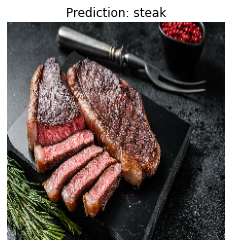

In [33]:
pred_and_plot(model=model_4,
              filename="images/steak.jpg",
              class_names=class_names)